# Exploring this Season's Avalanche Data

In [1]:
import scrape

import time
from datetime import date, timedelta
import datetime
from ast import literal_eval

from PIL import Image 
from random import randint
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

## Scrape/Import Data

In [2]:
#uncomment below if this is the first time running the notebook
#avalanche_data, general_obs_data, forecast_data = scrape.main()

~~ Welcome to the Utah Avalanche Data Scrape ~~
Looking for observations between 2023-04-27 and 2022-08-01
Scraping avalanche data...

Time elapsed scraping avalanche data: 10.270672098795574 min.
                     Observer Name Observation Date  \
0                             weed       2023-04-25   
1                         Martin K       2023-04-23   
2                             None       2023-04-24   
3  Andrew Nassetta via Third-Party       2023-04-23   
4                               jt       2023-04-23   

                                           Region  \
0                Logan » Logan Dry Canyon » Folly   
1     Ogden » Snowbasin Backcountry » Burch Creek   
2                   Ogden » Snowbasin Backcountry   
3                         Salt Lake » Snake Creek   
4  Salt Lake » Park City Ridgeline » No Name Bowl   

                Location Name or Route Snow Profile  \
0                     Logan Dry, Folly         None   
1               Backside of Strawberry     

In [6]:
#forecast_data = scrape.get_forecasts(start_date= scrape.get_season_start(scrape.TODAY), end_date=scrape.TODAY,region= 'Salt Lake', timed=True)


Time elapsed scraping forecasts: 9.330910702546438 min.


In [2]:
avalanche_data = scrape.load_data('./avalanche@2022_10_23&2023_04_25.csv')
general_obs_data = scrape.load_data('./observations@2022_10_22&2023_04_26.csv')
forecast_data = scrape.load_data('./forecast@Salt Lake@2022_08_01&2023_04_27.csv')

In [ ]:
#avalanche_data = scrape.update_data('./avalanche@2022_08_01&2023_04_25.csv')
#general_obs_data = scrape.update_data('./gen_obs_data@2022_08_01&2023_04_25.csv')
#forecast_data = scrape.update_data('./forecast@Salt Lake@2022_08_01&2023_04_23.csv')

## Data Clean

### Forecast

In [3]:
forecast_data.head()

,Date,Region,Danger Rose,Danger Rose URL,Avalanche Problem #1:Location,Avalanche Problem #1:Location Image Url,Avalanche Problem #1:Likelihood,Avalanche Problem #1:Size,Avalanche Problem #1:Description,Avalanche Problem #1:Type,...,Avalanche Problem #2:Likelihood,Avalanche Problem #2:Size,Avalanche Problem #2:Description,Avalanche Problem #2:Type,Avalanche Problem #3:Location,Avalanche Problem #3:Location Image Url,Avalanche Problem #3:Likelihood,Avalanche Problem #3:Size,Avalanche Problem #3:Description,Avalanche Problem #3:Type
0,2022-08-01,Salt Lake,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '...",https://utahavalanchecenter.org/sites/default/...,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wet Snow,...,NaN,NaN,NaN,New Snow,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wind Drifted Snow
1,2022-08-02,Salt Lake,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '...",https://utahavalanchecenter.org/sites/default/...,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wet Snow,...,NaN,NaN,NaN,New Snow,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wind Drifted Snow
2,2022-08-03,Salt Lake,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '...",https://utahavalanchecenter.org/sites/default/...,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wet Snow,...,NaN,NaN,NaN,New Snow,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wind Drifted Snow
3,2022-08-04,Salt Lake,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '...",https://utahavalanchecenter.org/sites/default/...,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wet Snow,...,NaN,NaN,NaN,New Snow,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wind Drifted Snow
4,2022-08-05,Salt Lake,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '...",https://utahavalanchecenter.org/sites/default/...,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wet Snow,...,NaN,NaN,NaN,New Snow,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,NaN,NaN,NaN,Wind Drifted Snow


In [4]:
forecast_data.loc[0, 'Danger Rose URL']

'https://utahavalanchecenter.org/sites/default/files/forecast/202304/20230427-071122-6.png'

### Avalanche & General Obs

In [5]:
avalanche_data.describe()

,Snow Profile,Elevation,Depth,Width,Carried
count,0.0,1116.000000,830.000000,830.000000,70.000000
mean,NaN,9057.795699,22.428916,150.168675,1.157143
std,NaN,1360.559822,18.935969,162.972525,0.366563
min,NaN,5100.000000,1.000000,5.000000,1.000000
25%,NaN,8200.000000,10.000000,40.000000,1.000000
50%,NaN,9400.000000,18.000000,90.000000,1.000000
75%,NaN,10000.000000,30.000000,200.000000,1.000000
max,NaN,12000.000000,144.000000,900.000000,2.000000


In [6]:
print(list(general_obs_data.columns))

['Observer Name', 'Observation Date', 'Region', 'Location Name or Route', 'Comments', 'Sky', 'Wind Direction', 'Wind Speed', 'Weather Comments', 'New Snow Depth', 'New Snow Density', 'Snow Surface Conditions', 'Snow Characteristics Comments', 'Red Flags', 'Red Flags Comments', 'Problem', 'Trend', 'Problem #1 Comments', 'Problem #2 Comments', 'Aspect', 'Elevation', 'Slope Angle', 'Trigger', 'Depth', 'Width', 'Carried', 'Forecast Region']


In [7]:
general_obs_data.describe()

,New Snow Depth,Elevation,Slope Angle,Trigger,Depth,Width,Carried
count,329.000000,410.000000,215.000000,0.0,0.0,0.0,0.0
mean,10.000000,8956.097561,25.441860,NaN,NaN,NaN,NaN
std,8.798212,1070.851586,6.522077,NaN,NaN,NaN,NaN
min,1.000000,5200.000000,5.000000,NaN,NaN,NaN,NaN
25%,4.000000,8400.000000,21.000000,NaN,NaN,NaN,NaN
50%,8.000000,8900.000000,26.000000,NaN,NaN,NaN,NaN
75%,12.000000,9700.000000,30.000000,NaN,NaN,NaN,NaN
max,72.000000,11500.000000,45.000000,NaN,NaN,NaN,NaN


#### Format Date

#### Filter Region

In [8]:
def split_subregions(region_str):
    '''splits the region format "Salt Lake » Big Cottonwood » Wolverine Peak" into ['Salt Lake', 'Big Cottonwoord', 'Wolverine Peak']'''
    region_list = [x.strip() for x in region_str.split('»')]
    return region_list

def get_forecast_region(region_str):
    subregions = split_subregions(region_str)
    forecast_region = subregions[0]
    return forecast_region

In [9]:
regions = avalanche_data.Region
region = regions.iloc[0]
print(region)
split_subregions(region)
print(split_subregions(region), get_forecast_region(region))

Logan » Logan Dry Canyon » Folly
['Logan', 'Logan Dry Canyon', 'Folly'] Logan


In [10]:
avalanche_data['Forecast Region'] = avalanche_data.Region.apply(get_forecast_region)
general_obs_data['Forecast Region'] = general_obs_data.Region.apply(get_forecast_region)
print(avalanche_data['Forecast Region'])

0           Logan
1           Ogden
2           Ogden
3       Salt Lake
4       Salt Lake
          ...    
1161    Salt Lake
1162         Moab
1163    Salt Lake
1164    Salt Lake
1165    Salt Lake
Name: Forecast Region, Length: 1166, dtype: object


In [11]:
avalanche_data.head()

,Observer Name,Observation Date,Region,Location Name or Route,Snow Profile,Comments,Elevation,Aspect,Trigger,Depth,Width,Carried,Forecast Region
0,weed,2023-04-25,Logan » Logan Dry Canyon » Folly,"Logan Dry, Folly",NaN,Natural wet loose avalanche or maybe a large ...,9000.0,Southwest,Natural,NaN,125.0,NaN,Logan
1,Martin K,2023-04-23,Ogden » Snowbasin Backcountry » Burch Creek,Backside of Strawberry,NaN,A large (natural?) avalanche broke on northwes...,9000.0,Northwest,Natural,18.0,500.0,NaN,Ogden
2,NaN,2023-04-24,Ogden » Snowbasin Backcountry,Snowbasin,NaN,Several skier triggered slides yesterday closi...,9300.0,Southeast,Skier,6.0,20.0,NaN,Ogden
3,Andrew Nassetta via Third-Party,2023-04-23,Salt Lake » Snake Creek,Snake Eyes North,NaN,"Rider caught, carried in small size-1 wet loos...",9300.0,Northeast,Snowboarder,4.0,10.0,1.0,Salt Lake
4,jt,2023-04-23,Salt Lake » Park City Ridgeline » No Name Bowl,"No Name Bowl 40.63445, -111.56349",NaN,NaN,9700.0,Northeast,Skier,4.0,30.0,NaN,Salt Lake


In [12]:
general_obs_data.head()

,Observer Name,Observation Date,Region,Location Name or Route,Comments,Sky,Wind Direction,Wind Speed,Weather Comments,New Snow Depth,...,Problem #1 Comments,Problem #2 Comments,Aspect,Elevation,Slope Angle,Trigger,Depth,Width,Carried,Forecast Region
0,Yicheng Zhang,2023-04-26,Salt Lake » Little Cottonwood Canyon » Superior,Superior/Cardiac,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,East,10500.0,NaN,NaN,NaN,NaN,NaN,Salt Lake
1,Nathan Z,2023-04-25,Salt Lake » Big Cottonwood Canyon » Greens Basin,Greens Basin,Heavy snow but wasn't sticking to my skins or ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salt Lake
2,Chamberlain,2023-04-25,Provo » Rock Canyon,Lion's Head,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provo
3,Owen Crandall,2023-04-22,Salt Lake » Parleys Canyon » Mt Aire,Mt Aire,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salt Lake
4,Eli Primmer,2023-04-22,Provo » Mt Nebo,Nebo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provo


## Analysis & Visualizaiton

### Shared Functions

#### Compass Functions

In [13]:
def altitude2rose(altitude):
    '''takes altitude label (ex. 'High', 'Mid', 'Low') or float and returns float of min max for plotting'''
    if altitude == "High":
        return (0,1)
    elif altitude == "Mid":
        return(1,2)
    else:
        return(2,3)
    
def aspect2rose(aspect):
    '''takes aspect (ex. 'NE', 'SW', etc.) and returns the min and max angle of that aspect (in radians)'''
    if aspect[0] == 'N':
        if len(aspect) == 1:
            return (3*np.pi/8, 5*np.pi/8)
        elif aspect[1] == 'E':
            return (np.pi/8, 3*np.pi/8)
        elif aspect[1] == 'W':
            return (5*np.pi/8, 7*np.pi/8)
    elif aspect[0] == 'S':
        if len(aspect) == 1:
            return (-5*np.pi/8, -3*np.pi/8)
        elif aspect[1] == 'E':
            return (-3*np.pi/8, -np.pi/8)
        elif aspect[1] == 'W':
            return (-7*np.pi/8 ,-5*np.pi/8)
    elif aspect == 'E':
        return(-np.pi/8, np.pi/8)
    elif aspect == 'W':
        return(7*np.pi/8, 9*np.pi/8)

def getFillxy(aspect, altitude):
    '''takes aspect and altitude label and outputs x and y for fill'''
    theta_min, theta_max = aspect2rose(aspect)
    rmin, rmax = altitude2rose(altitude)
    n = 30 #number of pints
    r_arc = np.concatenate((np.linspace(rmin, rmin, n), np.linspace(rmin, rmax, n), np.linspace(rmax, rmax, n), np.linspace(rmax, rmin, n)))
    theta_arc = np.concatenate((np.linspace(theta_min, theta_max, n), np.linspace(theta_max, theta_max, n), np.linspace(theta_max, theta_min, n), np.linspace(theta_min, theta_min, n)))
    
    x = r_arc*np.cos(theta_arc)
    y = r_arc*np.sin(theta_arc)
    return x,y

### Avalanche Analysis

In [14]:
avalanche_data.columns

Index(['Observer Name', 'Observation Date', 'Region', 'Location Name or Route',
       'Snow Profile', 'Comments', 'Elevation', 'Aspect', 'Trigger', 'Depth',
       'Width', 'Carried', 'Forecast Region'],
      dtype='object')

In [15]:
avalanche_data.describe()

,Snow Profile,Elevation,Depth,Width,Carried
count,0.0,1116.000000,830.000000,830.000000,70.000000
mean,NaN,9057.795699,22.428916,150.168675,1.157143
std,NaN,1360.559822,18.935969,162.972525,0.366563
min,NaN,5100.000000,1.000000,5.000000,1.000000
25%,NaN,8200.000000,10.000000,40.000000,1.000000
50%,NaN,9400.000000,18.000000,90.000000,1.000000
75%,NaN,10000.000000,30.000000,200.000000,1.000000
max,NaN,12000.000000,144.000000,900.000000,2.000000


#### Plot Avys on Compass

In [16]:
avalanche_data['Aspect'].value_counts()

Northeast    283
East         264
North        213
Southeast    103
Northwest     89
South         81
West          70
Southwest     39
Name: Aspect, dtype: int64

In [17]:
aspect_shorthands = {'North':'N',
           'Northeast':'NE', 
           'East':'E',
           'Southeast':'SE',
           'South':'S',
           'Southwest':'SW',
           'West':'W',
           'Northwest':'NW'}

aspect_angle = {'N': np.pi/2,
                'NE': np.pi/4,
                'E': 0,
                'SE': -np.pi/4,
                'S': -np.pi/2,
                'SW': -3*np.pi/4,
                'W': np.pi,
                'NW': 3*np.pi/4}
                

def class2coord(elevation):
    '''returns the radius component to plot elevation'''
    if elevation == 'Low':
        return 2.5
    elif elevation == 'Mid':
        return 1.5
    else:
        return .5

def ft2class(elevation):
    '''returns the radius component to plot elevation'''
    if elevation <= 8000:
        return 'Low'
    elif 8000 < elevation <= 9500:
        return 'Mid'
    else:
        return 'High'

def compass_coord(aspect, elevation_class):
    '''returns the coordinates to plot aspect and elevation'''
    if len(aspect) > 2:
        aspect = aspects[aspect]
    angle = aspect_angle[aspect]
    radius = class2coord(elevation_class)
    x = radius*np.cos(angle)
    y = radius*np.sin(angle)
    return x, y

def get_cmrgb(value, norm, cmap):
    return ScalarMappable(norm=norm, cmap=cmap).to_rgba(value)[0:3]

def compass_text(size =30, elevation = False):
    plt.text(-.2,3.2, 'N', fontsize=size)
    plt.text(-.2,-3.5, 'S', fontsize=size)
    plt.text(-3.7, 0, 'W', fontsize=size)
    plt.text(3.3, 0, 'E', fontsize=size)
    if elevation:
        plt.text(-3.6, -2.8, "Low: <8,000'", fontsize = 15)
        plt.text(-3.6, -3.1, "Mid: 8,000 - 9,500'", fontsize = 15)
        plt.text(-3.6, -3.4, "High: >9,500'", fontsize = 15)

In [18]:
zones = [('N', 'High'), ('NE', 'High'), ('NW', 'High'), ('W', 'High'), ('E', 'High'), ('SW', 'High'), ('S', 'High'), ('SE', 'High'), ('N', 'Mid'), ('NE', 'Mid'), ('NW', 'Mid'), ('W', 'Mid'), ('E', 'Mid'), ('SW', 'Mid'), ('S', 'Mid'), ('SE', 'Mid'), ('N', 'Low'), ('NE', 'Low'), ('NW', 'Low'), ('W', 'Low'), ('E', 'Low'), ('SW', 'Low'), ('S', 'Low'), ('SE', 'Low')]
avalanche_freq = dict.fromkeys(zones, 0)

avalanche_nona = avalanche_data[['Aspect', 'Elevation']].dropna(axis=0)

aspects, elevations = avalanche_nona.Aspect.to_list(), avalanche_nona.Elevation.to_list()
for i in range(len(aspects)):
    aspect = aspect_shorthands[aspects[i]]
    elevation_class = ft2class(elevations[i])
    avalanche_freq[(aspect, elevation_class)] += 1

avalanche_freq

{('N', 'High'): 76,
 ('NE', 'High'): 144,
 ('NW', 'High'): 33,
 ('W', 'High'): 19,
 ('E', 'High'): 102,
 ('SW', 'High'): 16,
 ('S', 'High'): 42,
 ('SE', 'High'): 53,
 ('N', 'Mid'): 46,
 ('NE', 'Mid'): 93,
 ('NW', 'Mid'): 25,
 ('W', 'Mid'): 24,
 ('E', 'Mid'): 111,
 ('SW', 'Mid'): 13,
 ('S', 'Mid'): 23,
 ('SE', 'Mid'): 37,
 ('N', 'Low'): 82,
 ('NE', 'Low'): 37,
 ('NW', 'Low'): 31,
 ('W', 'Low'): 24,
 ('E', 'Low'): 45,
 ('SW', 'Low'): 8,
 ('S', 'Low'): 13,
 ('SE', 'Low'): 11}

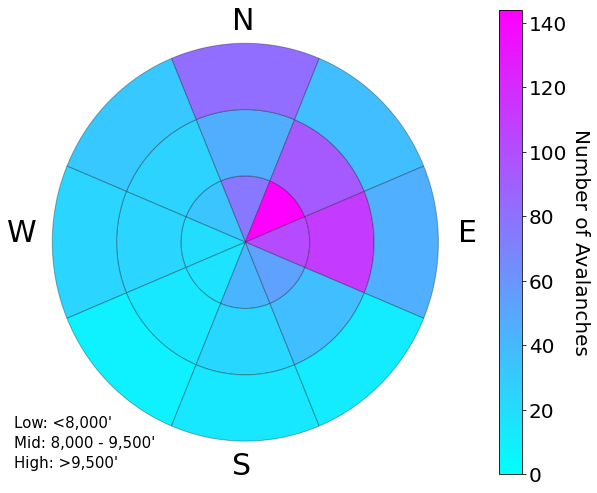

In [22]:
fig, ax = plt.subplots(1,1,figsize=(8.5,7))#subplot_kw={'projection':'polar'})

norm = plt.Normalize(0, max(avalanche_freq.values()))
cmap = 'cool'
cbar = ax.figure.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.ax.tick_params(labelsize = 20)

patches = []
for zone in avalanche_freq:
    freq = avalanche_freq[(zone[0], zone[1])]
    x,y = getFillxy(zone[0], zone[1]) 
    xy = np.array([x,y]).T
    color = get_cmrgb(freq, norm=norm, cmap=cmap)
    patch = Polygon(xy, facecolor = color,edgecolor=(0,0,0, .3))
    ax.add_patch(patch)
    #patches.append(patch)

cbar.ax.set_ylabel('Number of Avalanches', rotation=-90, va="bottom", size=20)

text = compass_text(elevation=True)
#p = PatchCollection(patches)
#ax.add_collection(p)
ax.set_xlim(-3.5,3.5)
ax.set_ylim(-3.5,3.5)
fig.set_alpha(1)
ax.set_alpha(1)
plt.axis('off')
plt.tight_layout()

plt.show()

last_date = max(avalanche_data['Observation Date'])
date_str = str(max(avalanche_data['Observation Date'])).replace('-', '_')
fig.savefig(f"./reported_avalanche_rose_{date_str}.png", transparent=False);

### Observation Analysis

### Forecast Analysis

In [23]:
forecast_data.columns

Index(['Date', 'Region', 'Danger Rose', 'Danger Rose URL',
       'Avalanche Problem #1:Location',
       'Avalanche Problem #1:Location Image Url',
       'Avalanche Problem #1:Likelihood', 'Avalanche Problem #1:Size',
       'Avalanche Problem #1:Description', 'Avalanche Problem #1:Type',
       'Avalanche Problem #2:Location',
       'Avalanche Problem #2:Location Image Url',
       'Avalanche Problem #2:Likelihood', 'Avalanche Problem #2:Size',
       'Avalanche Problem #2:Description', 'Avalanche Problem #2:Type',
       'Avalanche Problem #3:Location',
       'Avalanche Problem #3:Location Image Url',
       'Avalanche Problem #3:Likelihood', 'Avalanche Problem #3:Size',
       'Avalanche Problem #3:Description', 'Avalanche Problem #3:Type'],
      dtype='object')

In [24]:
forecast_data.describe()

,Date,Region,Danger Rose,Danger Rose URL,Avalanche Problem #1:Location,Avalanche Problem #1:Location Image Url,Avalanche Problem #1:Likelihood,Avalanche Problem #1:Size,Avalanche Problem #1:Description,Avalanche Problem #1:Type,...,Avalanche Problem #2:Likelihood,Avalanche Problem #2:Size,Avalanche Problem #2:Description,Avalanche Problem #2:Type,Avalanche Problem #3:Location,Avalanche Problem #3:Location Image Url,Avalanche Problem #3:Likelihood,Avalanche Problem #3:Size,Avalanche Problem #3:Description,Avalanche Problem #3:Type
count,270,270,266,266,259,259,154,154,61,259,...,118,120,37,214,128,128,33,35,11,128
unique,270,1,52,176,27,170,5,4,60,6,...,5,5,37,7,16,39,4,4,11,6
top,2022-08-01,Salt Lake,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '...",https://utahavalanchecenter.org/sites/default/...,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,"('Likely', 3)","('Medium-Small', 2)",Normal Caution is advised. A couple of things...,Wet Snow,...,"('Somewhat Likely', 2)","('Medium-Small', 2)",There was some graupel noted in the new snow a...,New Snow,"{('N', 'High'): 'Not Present', ('NE', 'High'):...",https://utahavalanchecenter.org/sites/default/...,"('Somewhat Likely', 2)","('Medium-Small', 2)",I am guessing there was a natural avalanche cy...,Wind Drifted Snow
freq,1,270,106,90,93,90,70,70,2,104,...,54,69,1,139,93,90,14,17,1,99


#### Plotting Custom Danger Rose

In [25]:
array1=np.linspace(0,1,5)
array2=np.linspace(1,2, 5)
print(array1,array2)
array=np.concatenate((array1, array2))
print(array)

[0.   0.25 0.5  0.75 1.  ] [1.   1.25 1.5  1.75 2.  ]
[0.   0.25 0.5  0.75 1.   1.   1.25 1.5  1.75 2.  ]


In [26]:
'STRING'[0]

'S'

In [27]:
def danger2Color(danger_level):
    '''returns danger color based on danger level'''
    colors = {1 : (0,204,0),
              2 : (255, 255, 0),
              3 : (255, 128, 0),
              4 : (255, 0, 0),
              5 : (0, 0,0),
              }

    return colors[danger_level]

(120, 2)


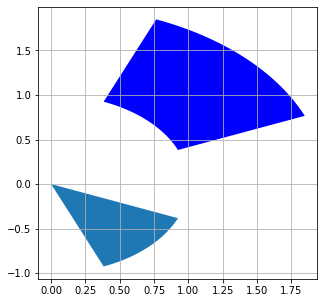

In [28]:
fig, ax = plt.subplots(figsize=(5,5))#subplot_kw={'projection':'polar'})
r_arc = np.concatenate((np.linspace(1,1, 20),np.linspace(1,2,20),np.linspace(2,2,20),np.linspace(2,1,20)))
theta_arc = np.concatenate((np.linspace(0,np.pi/2, 20),np.linspace(np.pi/2,np.pi/2,20),np.linspace(np.pi/2,0,20),np.linspace(0,0,20)))
#print(r_arc, theta_arc)
#x = r_arc*np.cos(theta_arc)
#y = r_arc*np.sin(theta_arc)
x,y = getFillxy('NE', 'Mid') 
#print(x,y)
a,b = getFillxy('SE', 'High')
#ab = np.concatenate((np.array(a), np.array(b)), axis=1)
ab = np.array([a,b]).T
print(ab.shape)
zone = Polygon(ab)#,fill=1, color='k')
p = PatchCollection([zone], alpha=1)
ax.add_collection(p)
ax.fill(x, y, 'b')
ax.grid(True)

plt.show()

In [29]:
print(forecast_data.loc[0,'Danger Rose'])
zones = list(forecast_data.loc[0,'Danger Rose'].keys())
#print(zones)
def randcolor(): return (randint(0,256), randint(0,256), randint(0,256))
randcolor()

{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', 'High'): 0, ('W', 'High'): 0, ('E', 'High'): 0, ('SW', 'High'): 0, ('S', 'High'): 0, ('SE', 'High'): 0, ('N', 'Mid'): 0, ('NE', 'Mid'): 0, ('NW', 'Mid'): 0, ('W', 'Mid'): 0, ('E', 'Mid'): 0, ('SW', 'Mid'): 0, ('S', 'Mid'): 0, ('SE', 'Mid'): 0, ('N', 'Low'): 0, ('NE', 'Low'): 0, ('NW', 'Low'): 0, ('W', 'Low'): 0, ('E', 'Low'): 0, ('SW', 'Low'): 0, ('S', 'Low'): 0, ('SE', 'Low'): 0}


(22, 9, 244)

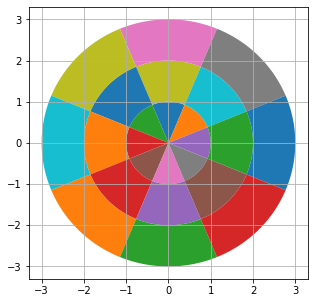

In [30]:
fig, ax = plt.subplots(1,1,figsize=(5,5))#subplot_kw={'projection':'polar'})

for zone in zones:
    x,y = getFillxy(zone[0], zone[1]) 
    #print(x,y)
    ax.fill(x, y)

ax.grid(True)

In [31]:
np.array(danger2Color(1))/256

array([0.      , 0.796875, 0.      ])

{('N', 'High'): 4, ('NE', 'High'): 4, ('NW', 'High'): 4, ('W', 'High'): 4, ('E', 'High'): 4, ('SW', 'High'): 4, ('S', 'High'): 4, ('SE', 'High'): 4, ('N', 'Mid'): 4, ('NE', 'Mid'): 4, ('NW', 'Mid'): 4, ('W', 'Mid'): 4, ('E', 'Mid'): 4, ('SW', 'Mid'): 4, ('S', 'Mid'): 4, ('SE', 'Mid'): 4, ('N', 'Low'): 3, ('NE', 'Low'): 3, ('NW', 'Low'): 3, ('W', 'Low'): 3, ('E', 'Low'): 3, ('SW', 'Low'): 3, ('S', 'Low'): 3, ('SE', 'Low'): 3}


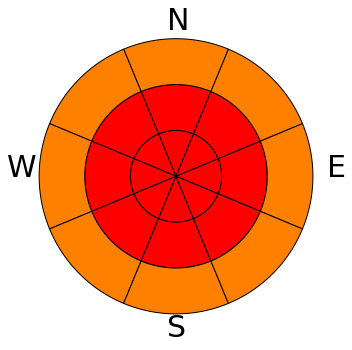

In [32]:
#today = datetime.date(2023, 4, 20)
todays_rose = forecast_data.loc[100,'Danger Rose']
print(todays_rose)
fig, ax = plt.subplots(1,1,figsize=(5,5))#subplot_kw={'projection':'polar'})

patches = []
for zone in zones:
    x,y = getFillxy(zone[0], zone[1]) 
    xy = np.array([x,y]).T
    #print(x,y)
    danger_level = todays_rose[zone]
    color = np.array(danger2Color(danger_level))/256
    #print(color)
    patch = Polygon(xy, facecolor = color, edgecolor=(0,0,0))
    ax.add_patch(patch)
    #patches.append(patch)

text = compass_text()
#p = PatchCollection(patches)
#ax.add_collection(p)
ax.set_xlim(-3.5,3.5)
ax.set_ylim(-3.5,3.5)
plt.axis('off')

plt.tight_layout()

In [33]:
def plot_danger_rose(danger_rose):
    '''takes the danger rose dictionary and outputs a corresponding graphical danger rose'''
    fig, ax = plt.subplots(1,1,figsize=(5,5))#subplot_kw={'projection':'polar'})

    patches = []
    for zone in zones:
        x,y = getFillxy(zone[0], zone[1]) 
        xy = np.array([x,y]).T
        #print(x,y)
        danger_level = danger_rose[zone]
        color = np.array(danger2Color(danger_level))/256
        #print(color)
        patch = Polygon(xy, facecolor = color, edgecolor=(0,0,0))
        ax.add_patch(patch)
        #patches.append(patch)

    #p = PatchCollection(patches)
    #ax.add_collection(p)
    ax.set_xlim(-3.5,3.5)
    ax.set_ylim(-3.5,3.5)
    plt.tight_layout()

In [34]:
forecast_data[forecast_data['Date'] == '2023-01-01']

,Date,Region,Danger Rose,Danger Rose URL,Avalanche Problem #1:Location,Avalanche Problem #1:Location Image Url,Avalanche Problem #1:Likelihood,Avalanche Problem #1:Size,Avalanche Problem #1:Description,Avalanche Problem #1:Type,...,Avalanche Problem #2:Likelihood,Avalanche Problem #2:Size,Avalanche Problem #2:Description,Avalanche Problem #2:Type,Avalanche Problem #3:Location,Avalanche Problem #3:Location Image Url,Avalanche Problem #3:Likelihood,Avalanche Problem #3:Size,Avalanche Problem #3:Description,Avalanche Problem #3:Type
153,2023-01-01,Salt Lake,"{('N', 'High'): 4, ('NE', 'High'): 4, ('NW', '...",https://utahavalanchecenter.org/sites/default/...,"{('N', 'High'): 'Present', ('NE', 'High'): 'Pr...",https://utahavalanchecenter.org/sites/default/...,"('Likely', 3)","('Medium', 3)",NaN,Persistent Weak Layer,...,"('Very Likely', 4)","('Medium-Small', 2)",NaN,New Snow,"{('N', 'High'): 'Present', ('NE', 'High'): 'Pr...",https://utahavalanchecenter.org/sites/default/...,"('Likely', 3)","('Medium-Small', 2)",Sensitive soft slabs of wind blown snow will b...,Wind Drifted Snow


In [35]:
day_ind = forecast_data.loc[forecast_data['Date'] == '2023-01-01'].index.to_list()[0]

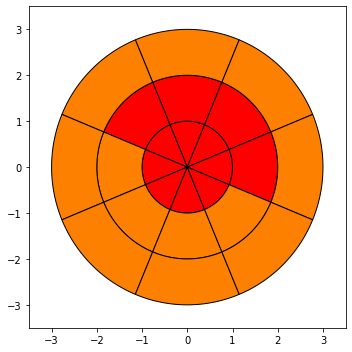

In [36]:
plot_danger_rose(forecast_data.loc[day_ind,'Danger Rose'])

In [37]:
def plot_rose_frame():
    '''plots a transparent frame of compass rose'''
    zones = [('N', 'High'), ('NE', 'High'), ('NW', 'High'), ('W', 'High'), ('E', 'High'), ('SW', 'High'), ('S', 'High'), ('SE', 'High'), ('N', 'Mid'), ('NE', 'Mid'), ('NW', 'Mid'), ('W', 'Mid'), ('E', 'Mid'), ('SW', 'Mid'), ('S', 'Mid'), ('SE', 'Mid'), ('N', 'Low'), ('NE', 'Low'), ('NW', 'Low'), ('W', 'Low'), ('E', 'Low'), ('SW', 'Low'), ('S', 'Low'), ('SE', 'Low')]
    fig, ax = plt.subplots(1,1,figsize=(5,5))#subplot_kw={'projection':'polar'})

    patches = []
    for zone in zones:
        x,y = getFillxy(zone[0], zone[1]) 
        xy = np.array([x,y]).T
        patch = Polygon(xy, facecolor = (1, 1, 1, 0),edgecolor=(0,0,0))
        ax.add_patch(patch)
        #patches.append(patch)

    #p = PatchCollection(patches)
    #ax.add_collection(p)
    ax.set_xlim(-3.5,3.5)
    ax.set_ylim(-3.5,3.5)
    plt.tight_layout()

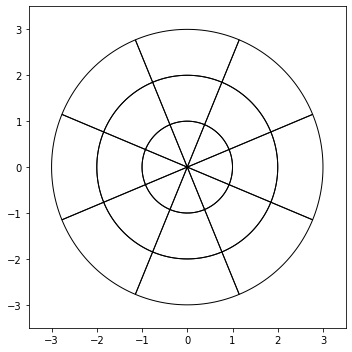

In [38]:
plot_rose_frame()

#### Danger Rose Movie

In [39]:
sample_rose_url = forecast_data['Danger Rose URL'].iloc[0]
print(sample_rose_url)

https://utahavalanchecenter.org/sites/default/files/forecast/202304/20230427-071122-6.png


#### Tracking Danger

In [40]:
df = forecast_data[["Date", "Danger Rose"]].set_index('Date', drop=True)
df.head()

,Danger Rose
Date,
2022-08-01,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '..."
2022-08-02,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '..."
2022-08-03,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '..."
2022-08-04,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '..."
2022-08-05,"{('N', 'High'): 0, ('NE', 'High'): 0, ('NW', '..."


In [41]:
type(df['Danger Rose'].to_list()[0])

dict

In [42]:
df.index

Index(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
       '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10',
       ...
       '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22',
       '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27'],
      dtype='object', name='Date', length=270)

In [43]:
aspect_multiindex = pd.Series(df['Danger Rose'].to_list()[0]).index #get multi index
dangerRoses = pd.DataFrame([pd.Series(x, dtype='object', index=aspect_multiindex) for x in df['Danger Rose']], index=df.index )
print(dangerRoses.columns.levels)
dangerRoses[dangerRoses.columns.levels[0]]

[['E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'W'], ['High', 'Low', 'Mid']]


E              N             NE             NW  ...    S   SE  \
           High  Mid  Low High  Mid  Low High  Mid  Low High  ...  Low High   
Date                                                          ...             
2022-08-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2022-08-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2022-08-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2022-08-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2022-08-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2023-04-23  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  2.0   
2023-04-24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2023-04-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2023-04-26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2023-04-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                       SW              W            
            Mid  Low High  Mid  Low High  Mid  Low  
Date                                                
2022-08-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-08-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-08-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-08-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-08-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  
2023-04-23  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  
2023-04-24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2023-04-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2023-04-26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2023-04-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[270 rows x 24 columns]

In [44]:
cardinal_dir = ['N', 'W', 'S', 'E']

In [45]:
type(dangerRoses)

pandas.core.frame.DataFrame

In [46]:
dangerRoses.columns.levels[1]

Index(['High', 'Low', 'Mid'], dtype='object')

In [47]:
dangerRoses.columns

MultiIndex([( 'N', 'High'),
            ('NE', 'High'),
            ('NW', 'High'),
            ( 'W', 'High'),
            ( 'E', 'High'),
            ('SW', 'High'),
            ( 'S', 'High'),
            ('SE', 'High'),
            ( 'N',  'Mid'),
            ('NE',  'Mid'),
            ('NW',  'Mid'),
            ( 'W',  'Mid'),
            ( 'E',  'Mid'),
            ('SW',  'Mid'),
            ( 'S',  'Mid'),
            ('SE',  'Mid'),
            ( 'N',  'Low'),
            ('NE',  'Low'),
            ('NW',  'Low'),
            ( 'W',  'Low'),
            ( 'E',  'Low'),
            ('SW',  'Low'),
            ( 'S',  'Low'),
            ('SE',  'Low')],
           )

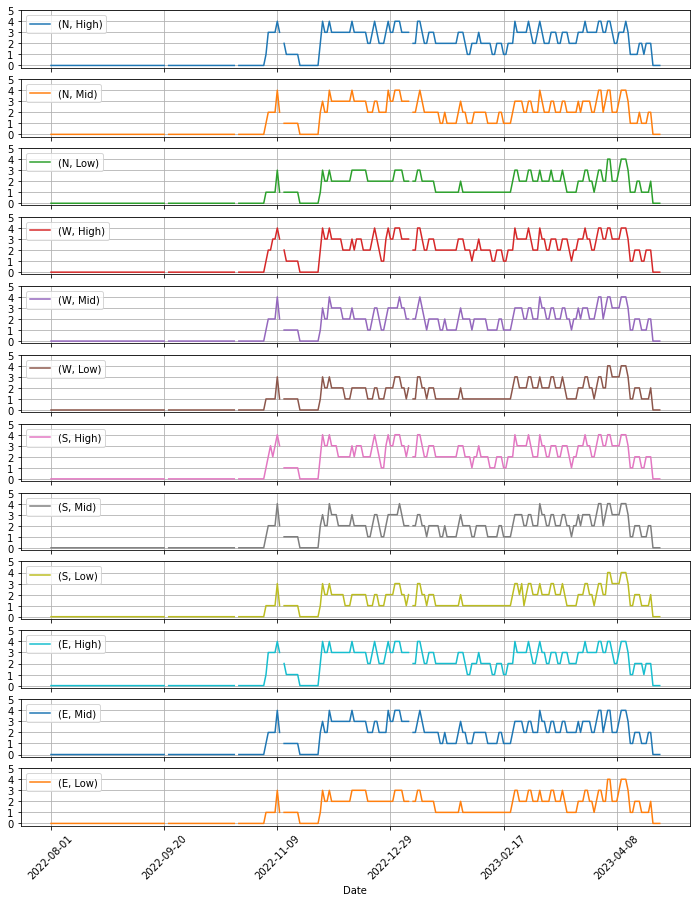

In [48]:
dangerRoses[cardinal_dir].plot(rot=45, figsize=(12,15), subplots=True, yticks=np.arange(0,6), grid=True);